## Yunke Zhu and 1330327

## Project 1


### Import required libraries.

In [321]:
import numpy as np
import pandas as pd
import csv
from sklearn.linear_model import LogisticRegression
import warnings
import nltk
from nltk.corpus import stopwords # import the stop word list
import os,re
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

import graphviz

In [487]:
import numpy as np
import pandas as pd

x_train_df = pd.read_csv('data/data_reviews/x_train.csv')
y_train_df = pd.read_csv('data/data_reviews/y_train.csv')


tr_text_list = x_train_df['text'].values.tolist()
te_text_list = x_test_df['text'].values.tolist()
tr_label_list = x_train_df['website_name'].values.tolist()
te_label_list = x_test_df['website_name'].values.tolist()
y_tr_list = y_train_df['is_positive_sentiment'].values.tolist()
y_tr = np.loadtxt('./data/data_reviews/y_train.csv', delimiter=',', skiprows=1)

# for text in tr_text_list:
#     print(text)

In [488]:
tr_te_test_list = tr_text_list + te_text_list

In [112]:
eng_stopwords = stopwords.words('english')

In [113]:
def clean_text(text, remove_stopwords=True):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.lower().split()
    if remove_stopwords:
        words = [w for w in words if w not in eng_stopwords]
    return words

In [114]:
def clean_text(text, remove_stopwords=True):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.lower().split()
    if remove_stopwords:
        words = [w for w in words if w not in eng_stopwords]
    return words
def review_to_words(raw_review):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words )) 

In [115]:

clean_review = review_to_words(tr_te_test_list[0])
tr_te_test_list = np.array(tr_te_test_list)

# number of reviews
num_reviews = tr_te_test_list.size

# initialize an empty list to hold the clean reviews
clean_all_reviews = []

# loop over each review
for i in range(0, num_reviews):
    #call function for each one, and add the result to the new list
    clean_all_reviews.append(review_to_words(tr_te_test_list[i]))
    
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 5000) 

# fit_transform() does two functions: 
# First, it fits the model and learns the vocabulary; 
# second, it transforms our training data into feature vectors. 
# The input to fit_transform should be a list of strings.
all_data_features = vectorizer.fit_transform(clean_all_reviews)

# Numpy arrays are easy to work with, 
# so convert the result to an array
all_data_features = all_data_features.toarray()

Creating the bag of words...



In [118]:
x_tr = all_data_features[:2400]
x_te = all_data_features[2400:]

In [141]:
clf = LogisticRegression(solver='liblinear').fit(x_tr, y_tr)

y_te = clf.predict(x_te)
np.savetxt('yproba1_test.txt', y_te)

In [123]:
from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS


In [128]:
mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i
        )
mlp_lbfgs.fit(x_tr, y_tr)
y_te = clf.predict(x_te)
np.savetxt('yproba1_test.txt', y_te)

In [133]:
from sklearn.neural_network import MLPClassifier

mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )

mlp_sgd.fit(x_tr, y_tr)
y_te = clf.predict(x_te)
np.savetxt('yproba1_test.txt', y_te)

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [135]:
from sklearn import svm
clf = svm.SVC(random_state=0)
clf.fit(x_tr, y_tr)
y_pred = clf.predict(x_te)
np.savetxt('yproba1_test.txt', y_pred)
# 0.242

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [138]:
k5nn_regr = sklearn.neighbors.KNeighborsRegressor(
    n_neighbors=5, algorithm='brute', metric='euclidean')
k5nn_regr.fit(x_tr, y_tr)
y_pred = k5nn_regr.predict(x_te)
np.savetxt('yproba1_test.txt', y_pred)
#0.328

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [140]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_tr, y_tr)
y_pred = clf.predict(x_te)
np.savetxt('yproba1_test.txt', y_pred)
# 0.28833

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [206]:
x_train_df = pd.read_csv('data/data_reviews/x_train.csv')


tr_text_list = x_train_df['text'].values.tolist()
te_text_list = x_test_df['text'].values.tolist()
tr_label_list = x_train_df['website_name'].values.tolist()
te_label_list = x_test_df['website_name'].values.tolist()


tr_te_test_list = tr_text_list + te_text_list
tr_te_test_list = np.array(tr_te_test_list)
 

In [207]:
vectorizer = TfidfVectorizer()
all_test_list = vectorizer.fit_transform(tr_te_test_list)
# print(vectorizer.get_feature_names())
# ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
print(all_test_list.shape)

(3000, 5155)


In [208]:
x_new_tr = all_test_list[:2400]
x_new_te = all_test_list[2400:]

In [189]:
clf = LogisticRegression(solver='liblinear').fit(x_new_tr, y_tr)

y_te = clf.predict(x_new_te)
np.savetxt('yproba1_test.txt', y_te)
# 0.17667

In [212]:
mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[5],
        activation='logistic',
        alpha=0.0001,
        max_iter=400, tol=1e-6,
        random_state=0
        )
mlp_lbfgs.fit(x_new_tr, y_tr)
y_te = clf.predict(x_new_te)
np.savetxt('yproba1_test.txt', y_te)

## New data

In [357]:
raw_data = pd.read_csv('data/data_reviews/IMDB.csv')
raw_data = raw_data[:2000]

In [358]:
len(raw_data)
new_data = []

In [359]:
big_new_x = raw_data['review'].values.tolist()
big_new_y = raw_data['sentiment'].values.tolist()

In [360]:
for i,_ in enumerate(big_new_y):
    if _ == 'positive':
        big_new_y[i] = 1
    else:
        big_new_y[i] = 0

In [298]:

tr_te_test_list = big_new_x +tr_text_list + te_text_list
big_new_y = big_new_y + y_tr_list
tr_te_test_list = np.array(tr_te_test_list)

# number of reviews
num_reviews = tr_te_test_list.size

# initialize an empty list to hold the clean reviews
clean_all_reviews = []

# loop over each review
for i in range(0, num_reviews):
    #call function for each one, and add the result to the new list
    clean_all_reviews.append(review_to_words(tr_te_test_list[i]))
    
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 5000) 

# fit_transform() does two functions: 
# First, it fits the model and learns the vocabulary; 
# second, it transforms our training data into feature vectors. 
# The input to fit_transform should be a list of strings.
all_data_features = vectorizer.fit_transform(clean_all_reviews)

# Numpy arrays are easy to work with, 
# so convert the result to an array
all_data_features = all_data_features.toarray()

Creating the bag of words...



In [289]:
all_data_features.shape
big_x_tr = all_data_features[:5400]
big_x_te = all_data_features[5400:]

In [290]:
clf = LogisticRegression(solver='liblinear').fit(big_x_tr, big_new_y)

y_te = clf.predict(big_x_te)
np.savetxt('yproba1_test.txt', y_te)

## TFIDF

In [425]:

tr_te_test_list = big_new_x +tr_text_list + te_text_list
big_new_y = big_new_y + y_tr_list
tr_te_test_list = np.array(tr_te_test_list)

# number of reviews
num_reviews = tr_te_test_list.size

for i in range(0, num_reviews):
    #call function for each one, and add the result to the new list
    clean_all_reviews.append(review_to_words(tr_te_test_list[i]))
    
vectorizer = TfidfVectorizer()


all_test_list = vectorizer.fit_transform(tr_te_test_list)

In [321]:
all_test_list.shape

(5000, 26134)

In [325]:
all_test_list.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [322]:
big_x_tr = all_test_list[:4400]
big_x_te = all_test_list[4400:]

In [480]:
clf = LogisticRegression(solver='liblinear').fit(big_x_tr, big_new_y)

y_te_logis = clf.predict(big_x_te)
np.savetxt('yproba1_test.txt', y_te)
# 0.16833

In [479]:
mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i
        )

mlp_lbfgs.fit(big_x_tr, big_new_y)
y_te_mlp = clf.predict(big_x_te)
np.savetxt('yproba1_test.txt', y_te)

# 0.16833

In [485]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( big_x_tr, big_new_y )
y_te_forest = forest.predict(big_x_te)
np.savetxt('yproba1_test.txt', y_te)

In [484]:
k10nn_regr = sklearn.neighbors.KNeighborsRegressor(
    n_neighbors=10, algorithm='brute', metric='euclidean')
k10nn_regr.fit(big_x_tr, big_new_y)
y_pred_knn = k5nn_regr.predict(big_x_te)
np.savetxt('yproba1_test.txt', y_pred)
# 0.25

In [426]:
clf = svm.SVC(random_state=0)
clf.fit(big_x_tr, big_new_y)
y_pred = clf.predict(big_x_te)
np.savetxt('yproba1_test.txt', y_pred)
# 0.165

## k-fold on mlp

In [395]:
def make_folds(num_folds=1,x=None, y=None):
    '''Splits data into num_folds separate folds for cross-validation.
       Each fold should consist of M consecutive items from the
       original data; each fold should be the same size (we will assume 
       that  the data divides evenly by num_folds).  Every data item should 
       appear in exactly one fold.
       
       Args
       ----
       num_folds : some positive integer value
           Number of folds to divide data into.
           
        Returns
        -------
        x_folds : list of sub-sequences of original x-data 
            There will be num_folds such sequences; each will 
            consist of 1/num_folds of the original data, in
            the original order.
        y_folds : list of sub-sequences of original y data
            There will be num_folds such sequences; each will 
            consist of 1/num_folds of the original data, in
            the original order.
       '''
    i = 0
    step = int(len(x) / num_folds)
    x_folds = list()
    y_folds = list()
    for k in range(num_folds):
        x_folds.append(x[i:i+step])
        y_folds.append(y[i:i+step])
        i += step
    
    # TODO: Complete method to generate partition into folds.
    
    return x_folds, y_folds

In [396]:
def generateFolds(k=1, x=None, y=None):
    xTrains=[]
    yTrains=[]
    step = int(len(x) / k)
    j = 0
    for i in range(k):
        rows = [_ for _ in range(j,j+step)]
        xTrains.append(np.delete(x,rows,0))
        yTrains.append(np.delete(y,rows,0))
        j += step
    return xTrains,yTrains

In [390]:
x_all_folds = big_new_x +tr_text_list 
y_all_folds = big_new_y + y_tr_list


In [537]:
def review_to_words(raw_review):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words )) 

In [490]:

tr_te_test_list = np.array(tr_te_test_list)

# number of reviews
num_reviews = tr_te_test_list.size

# initialize an empty list to hold the clean reviews
clean_all_reviews = []

# loop over each review
for i in range(0, num_reviews):
    #call function for each one, and add the result to the new list
    clean_all_reviews.append(review_to_words(tr_te_test_list[i]))
    
print("Creating the bag of words...\n")

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 5000) 

# fit_transform() does two functions: 
# First, it fits the model and learns the vocabulary; 
# second, it transforms our training data into feature vectors. 
# The input to fit_transform should be a list of strings.
all_data_features = vectorizer.fit_transform(clean_all_reviews)

# Numpy arrays are easy to work with, 
# so convert the result to an array
all_data_features = all_data_features.toarray()

Creating the bag of words...



In [491]:
all_data_features.shape

(3000, 5000)

# Preprocessing

In [704]:
def TestingTrainingErrorModel(k,xTrains=None,yTrains=None,x_folds=None,y_folds=None):
    
    C_loss = []
    C_accuracy = []
    for i in range(k):
#         print ("fold: %d"%i)
        
        
        x_tr_tmp = tuple(xTrains[i])
        yTrain = yTrains[i]
        x_te_tmp = tuple(x_folds[i])
        yTest = y_folds[i]

        all_tmp = np.asarray(x_tr_tmp + x_te_tmp)
        vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 5000) 
        all_generater = vectorizer.fit_transform(all_tmp)
        
        
        
        tr_len = len(x_tr_tmp)
        te_len = len(x_te_tmp)
        xTrain = all_generater[:tr_len]
        xTest = all_generater[tr_len:tr_len+te_len]


#         mlp_lbfgs = MLPClassifierLBFGS(
#         hidden_layer_sizes=[2],
#         activation='logistic',
#         alpha=0.0001,
#         max_iter=400, tol=1e-6,
#         random_state=0
#         )
        
#         mlp_lbfgs.fit(xTrain, yTrain)
#         pred_te = mlp_lbfgs.predict(xTest)
        
        LRM = LogisticRegression(solver='liblinear',C=1).fit(xTrain, yTrain)
        pred_te = LRM.predict_proba(xTest)
#         C_accuracy.append(clf.score(xTest,yTest))
        C_loss.append(sklearn.metrics.log_loss(yTest,pred_te))
        
#         counter = 0.0
#         for k in range(te_len):
#             if yTest[k] != pred_te[k]:
#                 counter += 1
#         C_accuracy.append(1-counter/te_len)
        
        
        
    return np.array(C_loss), np.array(C_accuracy)

In [706]:
loss_1,accuracy_1 = TestingTrainingErrorModel(k, xTrains, yTrains, x_folds, y_folds)

In [625]:
sum(accuracy_1)/10

0.7358333333333335

In [626]:
def TestingTrainingErrorModelEX(k,xTrains=None,yTrains=None,x_folds=None,y_folds=None):
    
    C_loss = []
    C_accuracy = []
    for i in range(k):
        
        
        x_tr_tmp = tuple(xTrains[i])
        yTrain = yTrains[i]
        x_te_tmp = tuple(x_folds[i])
        yTest = y_folds[i]
        all_tmp = np.asarray(x_tr_tmp + x_te_tmp)
        
        tr_te_test_list = np.array(all_tmp)


        num_reviews = tr_te_test_list.size

        clean_all_reviews = []


        for i in range(0, num_reviews):
    
            clean_all_reviews.append(review_to_words(tr_te_test_list[i]))
        
        

        vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 5000) 
        all_generater = vectorizer.fit_transform(clean_all_reviews)
        
        
        
        tr_len = len(x_tr_tmp)
        te_len = len(x_te_tmp)
        xTrain = all_generater[:tr_len]
        xTest = all_generater[tr_len:tr_len+te_len]


        mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=400, tol=1e-6,
        random_state=0
        )
        
        mlp_lbfgs.fit(xTrain, yTrain)
        pred_te = mlp_lbfgs.predict(xTest)
        
        counter = 0.0
        for k in range(te_len):
            if yTest[k] != pred_te[k]:
                counter += 1
        C_accuracy.append(1-counter/te_len)
       
        
    return np.array(C_loss), np.array(C_accuracy)

In [627]:
loss_2,accuracy_2 = TestingTrainingErrorModelEX(10, xTrains, yTrains, x_folds, y_folds)

In [628]:
sum(accuracy_2)/10

0.7

In [629]:
def TestingTrainingErrorModelTF(k,xTrains=None,yTrains=None,x_folds=None,y_folds=None):
    
    C_loss = []
    C_accuracy = []
    for i in range(k):
        
        
        x_tr_tmp = tuple(xTrains[i])
        yTrain = yTrains[i]
        x_te_tmp = tuple(x_folds[i])
        yTest = y_folds[i]
        all_tmp = np.asarray(x_tr_tmp + x_te_tmp)
        
        tr_te_test_list = np.array(all_tmp)


        num_reviews = tr_te_test_list.size

        clean_all_reviews = []


        for i in range(0, num_reviews):
    
            clean_all_reviews.append(review_to_words(tr_te_test_list[i]))
        
        

        vectorizer = TfidfVectorizer()
        all_generater = vectorizer.fit_transform(clean_all_reviews)
        
        
        
        tr_len = len(x_tr_tmp)
        te_len = len(x_te_tmp)
        xTrain = all_generater[:tr_len]
        xTest = all_generater[tr_len:tr_len+te_len]

        for i in range()
        mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=400, tol=1e-6,
        random_state=0
        )
        
        mlp_lbfgs.fit(xTrain, yTrain)
        pred_te = mlp_lbfgs.predict(xTest)
        
        counter = 0.0
        for k in range(te_len):
            if yTest[k] != pred_te[k]:
                counter += 1
        C_accuracy.append(1-counter/te_len)
         
    return np.array(C_loss), np.array(C_accuracy)

## Logistic

In [830]:
k = 5
x_folds,y_folds = make_folds(k,tr_text_list,y_tr_list)
xTrains,yTrains = generateFolds(5, tr_text_list, y_tr_list)

In [837]:
i = 1
x_tr_tmp = tuple(xTrains[i])
yTrain = yTrains[i]
x_te_tmp = tuple(x_folds[i])
yTest = y_folds[i]
all_tmp = np.asarray(x_tr_tmp + x_te_tmp)
        
tr_te_test_list = np.array(all_tmp)


num_reviews = tr_te_test_list.size

clean_all_reviews = []

print (num_reviews)
for i in range(0, num_reviews):
    
    clean_all_reviews.append(review_to_words(tr_te_test_list[i]))
        
        

vectorizer = TfidfVectorizer()
all_generater = vectorizer.fit_transform(clean_all_reviews)
        
tr_len = len(x_tr_tmp)
te_len = len(x_te_tmp)
xTrain = all_generater[:tr_len]
xTest = all_generater[tr_len:tr_len+te_len]

2400


In [838]:
C_grid = np.logspace(-9, 6, 31)
C_accuracy = []
C_loss = []
for C in C_grid:
    LRM = LogisticRegression(solver='liblinear',C=C).fit(xTrain, yTrain)
    pred_te = LRM.predict(xTest)
#     C_accuracy.append(clf.score(xTest,yTest))
    counter = 0.0
    for k in range(te_len):
        if yTest[k] != pred_te[k]:
            counter += 1
    C_accuracy.append(1-counter/te_len)
    C_loss.append(sklearn.metrics.log_loss(yTest,pred_te))



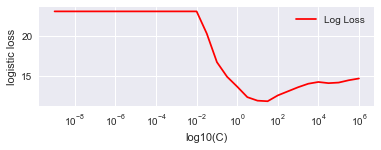

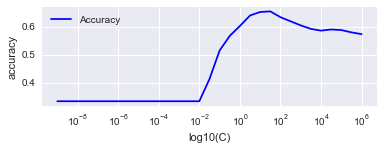

Best C-value for LR with 784-feature data: 31.6227766
Log-loss at best C-value: 11.9447
The accuracy under the best C value: 0.6542


In [839]:

# TODO make plot
plt.figure()
plt.subplot(211)

plt.xscale('log')
plt.xlabel('log10(C)')
plt.ylabel('logistic loss')
plt.plot(C_grid,C_loss, color='red',label = "Log Loss")

plt.legend()
plt.show()

plt.subplot(212)
plt.xscale('log')
plt.xlabel('log10(C)')
plt.ylabel('accuracy')
plt.plot(C_grid,C_accuracy, color='blue',label = "Accuracy")

plt.legend()
plt.show()
print("Best C-value for LR with 784-feature data: %.7f" % C_grid[np.argmax(C_accuracy)]) # TODO
print("Log-loss at best C-value: %.4f" % min(C_loss))
print("The accuracy under the best C value: %.4f" % C_accuracy[np.argmax(C_accuracy)])

## MLP 

In [844]:
i = 1
x_tr_tmp = tuple(xTrains[i])
yTrain = yTrains[i]
x_te_tmp = tuple(x_folds[i])
yTest = y_folds[i]
all_tmp = np.asarray(x_tr_tmp + x_te_tmp)
        
tr_te_test_list = np.array(all_tmp)


num_reviews = tr_te_test_list.size

clean_all_reviews = []

print (num_reviews)
for i in range(0, num_reviews):
    
    clean_all_reviews.append(review_to_words(tr_te_test_list[i]))
        
        

vectorizer = TfidfVectorizer()
all_generater = vectorizer.fit_transform(clean_all_reviews)
        
tr_len = len(x_tr_tmp)
te_len = len(x_te_tmp)
xTrain = all_generater[:tr_len]
xTest = all_generater[tr_len:tr_len+te_len]

2400


In [845]:
C_grid = [_ for _ in range(1,301)]
C_accuracy = []
C_loss = []
# for C in C_grid:
#     LRM = LogisticRegression(solver='liblinear',C=C).fit(xTrain, yTrain)
#     pred_te = LRM.predict(xTest)
# #     C_accuracy.append(clf.score(xTest,yTest))
#     counter = 0.0
#     for k in range(te_len):
#         if yTest[k] != pred_te[k]:
#             counter += 1
#     C_accuracy.append(1-counter/te_len)
#     C_loss.append(sklearn.metrics.log_loss(yTest,pred_te))


for i in range(1,301):
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=i, tol=1e-6,
        random_state=i
        )
    mlp_lbfgs.fit(xTrain, yTrain)
    pred_te = mlp_lbfgs.predict(xTest)
    counter = 0.0
    for k in range(te_len):
        if yTest[k] != pred_te[k]:
            counter += 1
    C_accuracy.append(1-counter/te_len)
    C_loss.append(sklearn.metrics.log_loss(yTest,pred_te))



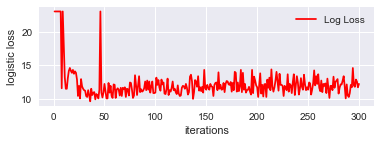

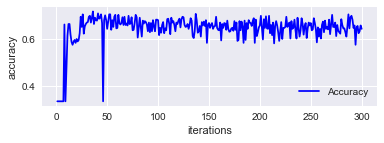

Best C-value for LR with 784-feature data: 36.0000000
Log-loss at best C-value: 9.6421
The accuracy under the best C value: 0.7208


In [846]:

# TODO make plot
plt.figure()
plt.subplot(211)

# plt.xscale('log')
plt.xlabel('iterations')
plt.ylabel('logistic loss')
plt.plot(C_grid,C_loss, color='red',label = "Log Loss")

plt.legend()
plt.show()

plt.subplot(212)
# plt.xscale('log')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.plot(C_grid,C_accuracy, color='blue',label = "Accuracy")

plt.legend()
plt.show()
print("Best C-value for LR with 784-feature data: %.7f" % C_grid[np.argmax(C_accuracy)]) # TODO
print("Log-loss at best C-value: %.4f" % min(C_loss))
print("The accuracy under the best C value: %.4f" % C_accuracy[np.argmax(C_accuracy)])

## SVM

In [847]:
i = 1
x_tr_tmp = tuple(xTrains[i])
yTrain = yTrains[i]
x_te_tmp = tuple(x_folds[i])
yTest = y_folds[i]
all_tmp = np.asarray(x_tr_tmp + x_te_tmp)
        
tr_te_test_list = np.array(all_tmp)


num_reviews = tr_te_test_list.size

clean_all_reviews = []

print (num_reviews)
for i in range(0, num_reviews):
    
    clean_all_reviews.append(review_to_words(tr_te_test_list[i]))
        
        

vectorizer = TfidfVectorizer()
all_generater = vectorizer.fit_transform(clean_all_reviews)
        
tr_len = len(x_tr_tmp)
te_len = len(x_te_tmp)
xTrain = all_generater[:tr_len]
xTest = all_generater[tr_len:tr_len+te_len]

2400


In [848]:
C_grid = np.logspace(-2, 2, 20)
rbf_C_accuracy = []
rbf_C_loss = []
# for C in C_grid:
#     LRM = LogisticRegression(solver='liblinear',C=C).fit(xTrain, yTrain)
#     pred_te = LRM.predict(xTest)
# #     C_accuracy.append(clf.score(xTest,yTest))
#     counter = 0.0
#     for k in range(te_len):
#         if yTest[k] != pred_te[k]:
#             counter += 1
#     C_accuracy.append(1-counter/te_len)
#     C_loss.append(sklearn.metrics.log_loss(yTest,pred_te))


for C in C_grid:
    clf = svm.SVC(random_state=0,C=C,probability=True).fit(xTrain, yTrain)     
    pred_te = clf.predict(xTest)
    counter = 0.0
    for k in range(te_len):
        if yTest[k] != pred_te[k]:
            counter += 1
    rbf_C_accuracy.append(1-counter/te_len)
    rbf_C_loss.append(sklearn.metrics.log_loss(yTest,pred_te))



In [849]:
C_grid = np.logspace(-2, 2, 20)
sigmoid_C_accuracy = []
sigmoid_C_loss = []
# for C in C_grid:
#     LRM = LogisticRegression(solver='liblinear',C=C).fit(xTrain, yTrain)
#     pred_te = LRM.predict(xTest)
# #     C_accuracy.append(clf.score(xTest,yTest))
#     counter = 0.0
#     for k in range(te_len):
#         if yTest[k] != pred_te[k]:
#             counter += 1
#     C_accuracy.append(1-counter/te_len)
#     C_loss.append(sklearn.metrics.log_loss(yTest,pred_te))


for C in C_grid:
    clf = svm.SVC(random_state=0,C=C,kernel='sigmoid').fit(xTrain, yTrain)     
    pred_te = clf.predict(xTest)
    counter = 0.0
    for k in range(te_len):
        if yTest[k] != pred_te[k]:
            counter += 1
    sigmoid_C_accuracy.append(1-counter/te_len)
    sigmoid_C_loss.append(sklearn.metrics.log_loss(yTest,pred_te))





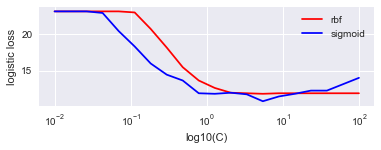

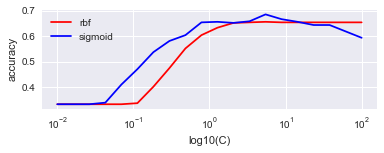

In [850]:

# TODO make plot
plt.figure()
plt.subplot(211)

plt.xscale('log')
plt.xlabel('log10(C)')
plt.ylabel('logistic loss')
plt.plot(C_grid,rbf_C_loss, color='red',label = "rbf")
plt.plot(C_grid,sigmoid_C_loss, color='blue',label = "sigmoid")

plt.legend()
plt.show()

plt.subplot(212)
plt.xscale('log')
plt.xlabel('log10(C)')
plt.ylabel('accuracy')
plt.plot(C_grid,rbf_C_accuracy, color='red',label = "rbf")
plt.plot(C_grid,sigmoid_C_accuracy, color='blue',label = "sigmoid")

plt.legend()
plt.show()


In [851]:
import time
start_time_sec = time.time()
clf = svm.SVC(random_state=0,C=8,kernel='sigmoid').fit(xTrain, yTrain)
pred_te = clf.predict(xTest)
counter = 0.0
for k in range(te_len):
    if yTest[k] != pred_te[k]:
        counter += 1

print("SVM costs: %.5f seconds, accuracy: %.3f, logloss: %.2f" %(time.time() - start_time_sec, 1-counter/te_len, sklearn.metrics.log_loss(yTest,pred_te)))


start_time_sec = time.time()
mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=50, tol=1e-6,
        random_state=i
        )
mlp_lbfgs.fit(xTrain, yTrain)
pred_te = mlp_lbfgs.predict(xTest)
counter = 0.0
for k in range(te_len):
    if yTest[k] != pred_te[k]:
        counter += 1

print("MLP costs: %.5f seconds, accuracy: %.3f, logloss: %.2f" %(time.time() - start_time_sec, 1-counter/te_len, sklearn.metrics.log_loss(yTest,pred_te)))

start_time_sec = time.time()

LRM = LogisticRegression(solver='liblinear',C=31.6667).fit(xTrain, yTrain)
pred_te = LRM.predict(xTest)
counter = 0.0
for k in range(te_len):
    if yTest[k] != pred_te[k]:
        counter += 1

print("LogisticRegression costs: %.5f seconds, accuracy: %.3f, logloss: %.2f" %(time.time() - start_time_sec, 1-counter/te_len, sklearn.metrics.log_loss(yTest,pred_te)))




SVM costs: 0.25139 seconds, accuracy: 0.671, logloss: 11.37
MLP costs: 0.05424 seconds, accuracy: 0.669, logloss: 11.44
LogisticRegression costs: 0.00539 seconds, accuracy: 0.654, logloss: 11.94


In [630]:
loss_3,accuracy_3 = TestingTrainingErrorModelTF(10, xTrains, yTrains, x_folds, y_folds)

In [631]:
sum(accuracy_3)/10

0.7145833333333333

In [840]:
logistic_accuracy = [0.654,0.632]

In [794]:
logistic_accuracy

[0.0, 0.7]

In [841]:
svm_accuracy = [0.631, 0.612]

In [796]:
svm_accuracy

[0.0, 0.7]

In [797]:
sigmoid_accuracy = [sum(accuracy_1)/10, sum(accuracy_2)/10]

In [592]:
sigmoid_accuracy

[0.5908333333333332, 0.69625, 0.69625]

In [842]:
mlp_accuracy = [0.588, 0.573]

In [622]:
mlp_accuracy

[0.7291666666666666, 0.6704166666666667, 0.68]

In [665]:
index

array([0, 1, 2])

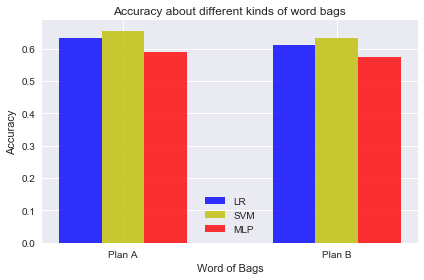

In [843]:
n_groups = 2
logistic_accuracy = (logistic_accuracy)
svm_accuracy = (svm_accuracy)
mlp_accuracy = (mlp_accuracy)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, svm_accuracy, bar_width,
alpha=opacity,
color='b',
label='LR')

rects2 = plt.bar(index + bar_width, logistic_accuracy, bar_width,
alpha=opacity,
color='y',
label='SVM')

rects3 = plt.bar(index + bar_width+ bar_width, mlp_accuracy, bar_width,
alpha=opacity,
color='r',
label='MLP')

plt.xlabel('Word of Bags')
plt.ylabel('Accuracy')
plt.title('Accuracy about different kinds of word bags')
plt.xticks(index + bar_width, ('Plan A', 'Plan B', 'Plan C'))
plt.legend()

plt.tight_layout()
plt.show()

In [662]:
[logistic_accuracy[0],mlp_accuracy[0],svm_accuracy[0]]

[0.725, 0.7291666666666666, 0.6174999999999999]

<BarContainer object of 3 artists>

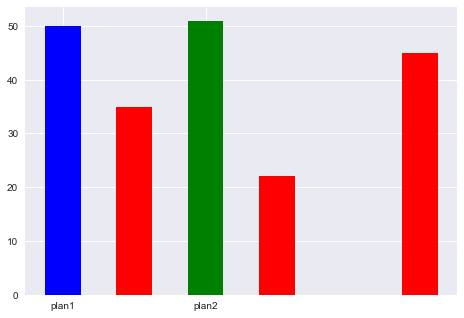

In [656]:
data = [[30, 25, 50],
[40, 23, 51],
[35, 22, 45]]
X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar("plan1", data[0], color = 'b', width = 0.25)
ax.bar("plan2", data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

In [645]:
data[0]

[30, 25, 50, 20]

In [407]:
def TestingTrainingError(k,xTrains=None,yTrains=None,x_folds=None,y_folds=None):
    
    best_C = []
    best_score = []
    C_grid = np.logspace(-9, 6, 31)
    
    for i in range(k):
        print ("fold: %d"%i)
        
        
        x_tr_tmp = tuple(xTrains[i])
        yTrain = yTrains[i]
        x_te_tmp = tuple(x_folds[i])
        yTest = y_folds[i]
        constTe = tuple(te_text_list)

        all_tmp = np.asarray(x_tr_tmp + x_te_tmp + constTe)
        vectorizer = TfidfVectorizer()
        all_generater = vectorizer.fit_transform(all_tmp)
        
        
        
        tr_len = len(x_tr_tmp)
        te_len = len(x_te_tmp)
        xTrain = all_generater[:tr_len]
        xTest = all_generater[tr_len:tr_len+te_len]

        
        
        C_accuracy = []
        C_loss = []

        for C in C_grid:
            LRM = LogisticRegression(solver='lbfgs',C=C).fit(xTrain, yTrain)
            pred_te = LRM.predict_proba(xTest)
            C_accuracy.append(LRM.score(xTest,yTest))
            C_loss.append(sklearn.metrics.log_loss(yTest,pred_te))
        best_C.append(C_grid[np.argmin(C_loss)])
        best_score.append(np.array(C_accuracy))
        
    return np.array(best_C), np.array(best_score)

In [408]:
k = 5
x_folds,y_folds = make_folds(k,x_all_folds,y_all_folds)
xTrains,yTrains = generateFolds(5, x_all_folds, y_all_folds)


In [409]:
best_C,score = TestingTrainingError(k, xTrains, yTrains, x_folds, y_folds)

fold: 0
fold: 1
fold: 2
fold: 3
fold: 4


In [410]:
best_C

array([31.6227766 , 10.        ,  3.16227766, 10.        , 10.        ])

In [411]:
x_tr_tmp = tuple(xTrains[1])
yTrain = yTrains[1]
x_te_tmp = tuple(x_folds[1])
yTest = y_folds[1]
constTe = tuple(te_text_list)
all_tmp = np.asarray(x_tr_tmp + x_te_tmp + constTe)
vectorizer = TfidfVectorizer()
all_generater = vectorizer.fit_transform(all_tmp)
        
tr_len = len(x_tr_tmp)
te_len = len(x_te_tmp)
xTrain = all_generater[:tr_len]
xTest = all_generater[tr_len:tr_len+te_len]

LRM = LogisticRegression(solver='liblinear',C=10).fit(xTrain, yTrain)
y_pred = LRM.predict(big_x_te)
np.savetxt('yproba1_test.txt', y_pred)
# 0.16833

In [455]:
def TestingTrainingErrorSVM(k,xTrains=None,yTrains=None,x_folds=None,y_folds=None):
    
    best_C = []
    best_score = []
    C_grid = [0.01,0.1,1,10,100]
    for i in range(k):
        print ("fold: %d"%i)
        
        
        x_tr_tmp = tuple(xTrains[i])
        yTrain = yTrains[i]
        x_te_tmp = tuple(x_folds[i])
        yTest = y_folds[i]
        constTe = tuple(te_text_list)

        all_tmp = np.asarray(x_tr_tmp + x_te_tmp + constTe)
        vectorizer = TfidfVectorizer()
        all_generater = vectorizer.fit_transform(all_tmp)
        
        
        
        tr_len = len(x_tr_tmp)
        te_len = len(x_te_tmp)
        xTrain = all_generater[:tr_len]
        xTest = all_generater[tr_len:tr_len+te_len]

        C_accuracy = []
        C_loss = []

        for C in [0.01,0.1,1,10,100]:
            clf = svm.SVC(random_state=0,C=C,probability=True).fit(xTrain, yTrain)
            pred_te = clf.predict_proba(xTest)
            C_accuracy.append(clf.score(xTest,yTest))
            C_loss.append(sklearn.metrics.log_loss(yTest,pred_te))
        best_C.append(C_grid[np.argmin(C_loss)])
        best_score.append(np.array(C_accuracy))
        
    return np.array(best_C), np.array(best_score)

In [417]:
best_C,score = TestingTrainingErrorSVM(k, xTrains, yTrains, x_folds, y_folds)

fold: 0
fold: 1
fold: 2
fold: 3
fold: 4


In [421]:
score

array([[0.99772727, 0.99772727, 0.99772727, 0.99772727, 0.99772727],
       [0.83068182, 0.83068182, 0.83068182, 0.83068182, 0.83068182],
       [0.99545455, 0.99545455, 0.99545455, 0.99545455, 0.99545455],
       [0.98636364, 0.98636364, 0.98636364, 0.98636364, 0.98636364],
       [0.99090909, 0.99090909, 0.99090909, 0.99090909, 0.99090909]])

In [418]:
best_C

array([3.16227766e-08, 3.16227766e-08, 1.00000000e-08, 3.16227766e-08,
       3.16227766e-08])

In [423]:
x_tr_tmp = tuple(xTrains[0])
yTrain = yTrains[0]
x_te_tmp = tuple(x_folds[0])
yTest = y_folds[0]
constTe = tuple(te_text_list)
all_tmp = np.asarray(x_tr_tmp + x_te_tmp + constTe)
vectorizer = TfidfVectorizer()
all_generater = vectorizer.fit_transform(all_tmp)
        
tr_len = len(x_tr_tmp)
te_len = len(x_te_tmp)
xTrain = all_generater[:tr_len]
xTest = all_generater[tr_len:tr_len+te_len]

clf = svm.SVC(random_state=0, tol = 0.000001, C=0.1,kernel='sigmoid').fit(xTrain, yTrain)

y_pred = clf.predict(big_x_te)
np.savetxt('yproba1_test.txt', y_pred)
# 0.16833

In [438]:
clf = svm.SVC(random_state=0,kernel='sigmoid')
clf.fit(big_x_tr, big_new_y)
y_pred = clf.predict(big_x_te)
np.savetxt('yproba1_test.txt', y_pred)

# 0.15

In [431]:
clf = svm.SVC(random_state=0,kernel='linear')
clf.fit(big_x_tr, big_new_y)
y_pred = clf.predict(big_x_te)
np.savetxt('yproba1_test.txt', y_pred)
# 0.155


In [437]:
clf = svm.SVC(random_state=0,kernel='poly',degree=2)
clf.fit(big_x_tr, big_new_y)
y_pred = clf.predict(big_x_te)
np.savetxt('yproba1_test.txt', y_pred)

# 0.16167

In [ ]:
clf = svm.SVC(random_state=0,kernel='sigmoid')
clf.fit(big_x_tr, big_new_y)
y_pred = clf.predict(big_x_te)
np.savetxt('yproba1_test.txt', y_pred)

# 0.15

In [453]:
def TestingTrainingErrorSVMCOEF(k,xTrains=None,yTrains=None,x_folds=None,y_folds=None):
    
    best_C = []
    best_score = []
    C_grid = [-100, -10, -1, -0.1, -0.01, 0, 0.01,0.1,1,10,100]
    for i in range(k):
        print ("fold: %d"%i)
        
        
        x_tr_tmp = tuple(xTrains[i])
        yTrain = yTrains[i]
        x_te_tmp = tuple(x_folds[i])
        yTest = y_folds[i]
        constTe = tuple(te_text_list)

        all_tmp = np.asarray(x_tr_tmp + x_te_tmp + constTe)
        vectorizer = TfidfVectorizer()
        all_generater = vectorizer.fit_transform(all_tmp)
        
        
        
        tr_len = len(x_tr_tmp)
        te_len = len(x_te_tmp)
        xTrain = all_generater[:tr_len]
        xTest = all_generater[tr_len:tr_len+te_len]

        C_accuracy = []
        C_loss = []

        for C in C_grid:
            print (C)
            clf = svm.SVC(random_state=0,probability=True,kernel='sigmoid',coef0=C).fit(xTrain, yTrain)
            pred_te = clf.predict_proba(xTest)
            C_accuracy.append(clf.score(xTest,yTest))
            C_loss.append(sklearn.metrics.log_loss(yTest,pred_te))
        best_C.append(C_grid[np.argmin(C_loss)])
        best_score.append(np.array(C_accuracy))
        
    return np.array(best_C), np.array(best_score)

In [454]:
best_C,score = TestingTrainingErrorSVMCOEF(k, xTrains, yTrains, x_folds, y_folds)

fold: 0
-100
-10
-1
-0.1
-0.01
0
0.01
0.1
1
10
100
fold: 1
-100
-10
-1
-0.1
-0.01
0
0.01
0.1
1
10
100
fold: 2
-100
-10
-1
-0.1
-0.01
0
0.01
0.1
1
10
100
fold: 3
-100
-10
-1
-0.1
-0.01
0
0.01
0.1
1
10
100
fold: 4
-100
-10
-1
-0.1
-0.01
0
0.01
0.1
1
10
100


In [456]:
best_C

array([-1, -1, -1, -1, -1])

In [457]:
score

array([[0.49886364, 0.49886364, 0.85      , 0.84659091, 0.84659091,
        0.84772727, 0.84772727, 0.84431818, 0.8375    , 0.49886364,
        0.49886364],
       [0.48977273, 0.48977273, 0.83068182, 0.82840909, 0.82840909,
        0.82954545, 0.82954545, 0.83181818, 0.80681818, 0.48977273,
        0.48977273],
       [0.40568182, 0.40568182, 0.72840909, 0.74204545, 0.74431818,
        0.74659091, 0.74431818, 0.74431818, 0.71590909, 0.40568182,
        0.40568182],
       [0.45454545, 0.45454545, 0.8       , 0.80909091, 0.80681818,
        0.80681818, 0.80681818, 0.80568182, 0.79659091, 0.45454545,
        0.45454545],
       [0.45454545, 0.45454545, 0.78409091, 0.76704545, 0.76931818,
        0.76931818, 0.77045455, 0.77159091, 0.77386364, 0.45454545,
        0.45454545]])

In [466]:
x_tr_tmp = tuple(xTrains[0])
yTrain = yTrains[0]
x_te_tmp = tuple(x_folds[0])
yTest = y_folds[0]
constTe = tuple(te_text_list)
all_tmp = np.asarray(x_tr_tmp + x_te_tmp + constTe)
vectorizer = TfidfVectorizer()
all_generater = vectorizer.fit_transform(all_tmp)
        
tr_len = len(x_tr_tmp)
te_len = len(x_te_tmp)
xTrain = all_generater[:tr_len]
xTest = all_generater[tr_len:tr_len+te_len]

clf = svm.SVC(random_state=0,coef0=-1,kernel='sigmoid').fit(xTrain, yTrain)

y_pred = clf.predict(big_x_te)
np.savetxt('yproba1_test.txt', y_pred)
# 0.16333

In [465]:
x_tr_tmp = tuple(xTrains[0])
yTrain = yTrains[0]
x_te_tmp = tuple(x_folds[0])
yTest = y_folds[0]
constTe = tuple(te_text_list)
all_tmp = np.asarray(x_tr_tmp + x_te_tmp + constTe)
vectorizer = TfidfVectorizer()
all_generater = vectorizer.fit_transform(all_tmp)
        
tr_len = len(x_tr_tmp)
te_len = len(x_te_tmp)
xTrain = all_generater[:tr_len]
xTest = all_generater[tr_len:tr_len+te_len]

clf = svm.SVC(random_state=0,coef0=-1,kernel='sigmoid',C=10).fit(xTrain, yTrain)

y_pred = clf.predict(big_x_te)
np.savetxt('yproba1_test.txt', y_pred)
# 0.155

In [458]:
best_C,score = TestingTrainingErrorSVM(k, xTrains, yTrains, x_folds, y_folds)

fold: 0
fold: 1
fold: 2
fold: 3
fold: 4


In [459]:
best_C

array([10, 10,  1, 10, 10])

In [460]:
score

array([[0.49886364, 0.77045455, 0.84659091, 0.84545455, 0.84545455],
       [0.48977273, 0.52159091, 0.81931818, 0.83068182, 0.83068182],
       [0.40568182, 0.40795455, 0.72386364, 0.72386364, 0.72386364],
       [0.45454545, 0.47613636, 0.8       , 0.81477273, 0.81477273],
       [0.45454545, 0.47159091, 0.78295455, 0.78863636, 0.78863636]])

In [478]:
clf = svm.SVC(random_state=0,kernel='sigmoid')
clf.fit(big_x_tr, big_new_y)
y_pred_svm = clf.predict(big_x_te)
np.savetxt('yproba1_test.txt', y_pred)


In [481]:
y_pred_svm.shape

(600,)

In [486]:
# y_te_mlp y_pred_svm y_te_logis

for i in range(600):
    if y_te_mlp[i] + y_pred_svm[i] + y_te_logis[i] +y_pred_knn[i] + y_te_forest[i] >= 3:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
np.savetxt('yproba1_test.txt', y_pred)

# PART2

In [443]:

import sklearn.neighbors

from collections import OrderedDict

word_embeddings = pd.read_csv('glove.6B.50d.txt.zip',
                               header=None, sep=' ', index_col=0,
                               nrows=100000, compression='zip', encoding='utf-8', quoting=3)
# Build a dict that will map from string word to 50-dim vector
word_list = word_embeddings.index.values.tolist()
word2vec = OrderedDict(zip(word_list, word_embeddings.values))

## Show some examples
n_words = len(word2vec.keys())
print("word2vec['london'] = ")
print(word2vec['london'])

print("word2vec['england'] = ")
print(word2vec['england'])

## Try some analogies
def analogy_lookup(a1, a2, b1):
    target_vec = word2vec[a2] - word2vec[a1] + word2vec[b1]
    knn = sklearn.neighbors.NearestNeighbors(n_neighbors=7, metric='euclidean', algorithm='brute')
    knn.fit(word_embeddings.values)
    dists, indices = knn.kneighbors(target_vec[np.newaxis,:])
    print("Query: %s:%s -> %s:____" % (a1, a2, b1))
    for ii, vv in enumerate(indices[0]):
        print("   %20s  at dist %.3f" % (word_list[vv], dists[0,ii]))

analogy_lookup('england', 'london', 'france')
analogy_lookup('england', 'london', 'germany')
analogy_lookup('england', 'london', 'japan')
analogy_lookup('england', 'london', 'indonesia')

analogy_lookup('swim', 'swimming', 'run')


FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.50d.txt.zip'